<a href="https://colab.research.google.com/github/NayeliZuniga/Simulacion1/blob/main/Monte_Carlo_(Media_muestral).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Monte Carlo **Crudo** (Media Muestral)

I **=** *∫ g(x) dx* **=** *∫ w(x) ⋅ f(x) dx* **=** E(*g(x)*) **≈** (1/N) ⋅ ∑ *g(x_i)*


Donde:
* x_i~U(a,b)
* w(x)=g(X)⋅(b-a)
* f(x)=1/(b-a) → U(a,b)

Se importan las librerias necesarias

In [34]:
import random
import math
import matplotlib.pyplot as plot
import numpy

Se define la funcion de la cual se quiere aproximar la integral

In [35]:
def g(x):
  x=math.sqrt(math.atan(x))
  return x

Consideremos el metodo de Monte Carlo de la Media Muestral

In [36]:
def montecarlo_crudo(a, b, n):        #a & b:intervalos de integracion
  al=[]                               #lista para la secuencia {U_i}_{i=1}^n ~ U(0,1)
  x=[]
  gx=[]                               #lista para la evaluiacion de x
  for i in range(n):
  #secuencia {U_i}_{i=1}^n ~ U(0,1)
    al.append(random.uniform(a,b))
  #x_i= a + U_i * (b-a)
    x.append(a+(al[i]*(b-a)))
  #Evaluacion de los x en la funcion
    gx.append(g(x[i]))
  #Estimador
  teta=(b-a)*sum(gx)
  return teta/n


Aplicandolo

In [37]:
montecarlo_crudo(0,1,1000)

0.6249363207080914

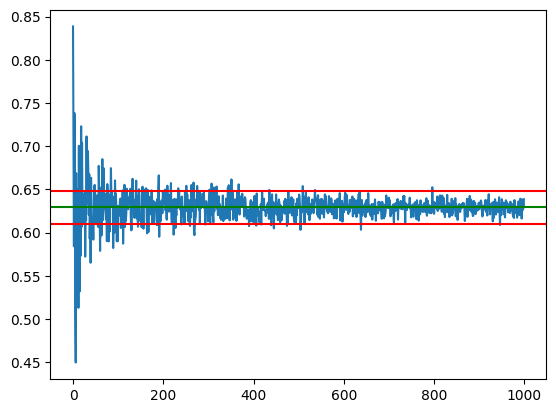

In [52]:
def experimento(k):
  evolucion=[]
  for i in range(k):
    evolucion.append(montecarlo_crudo(0,1,i+1))
  plot.plot(evolucion)
  return evolucion

L=experimento(1000)
plot.axhline(y=numpy.mean(L), color='g')
plot.axhline(y=(numpy.mean(L)+numpy.sqrt(numpy.var(L))), color='r')
plot.axhline(y=(numpy.mean(L)-numpy.sqrt(numpy.var(L))), color='r')

[0.8355054785576727,
 0.8093412379779426,
 0.6265597868670326,
 0.5417343478229475,
 0.5825071939178343,
 0.6940498416157787,
 0.7575071703983455,
 0.5968793066321544,
 0.6928651483649939,
 0.6197796898798179,
 0.7204459772869444,
 0.601497466019591,
 0.624660054193071,
 0.5725353777074345,
 0.5261394454396011,
 0.6178460927678782,
 0.6179017659938278,
 0.6655283485258258,
 0.642916313075476,
 0.710525347473608,
 0.67216233481017,
 0.6394387374267562,
 0.5749580321764443,
 0.6714034038321405,
 0.644475620589682,
 0.5415854500355229,
 0.6192138293252394,
 0.5957618746956754,
 0.6020964801342488,
 0.7203744502148925,
 0.6478380094999212,
 0.6193121377551353,
 0.6253050444194604,
 0.6870204979687636,
 0.5787544959355521,
 0.5852707374841721,
 0.6761943235766339,
 0.6258756320940271,
 0.5695158460460246,
 0.6613756068144572,
 0.5656125655700885,
 0.623948296553864,
 0.6581977423488594,
 0.5776213906226063,
 0.684200824557568,
 0.6400716500583082,
 0.6024842666640885,
 0.6628781294764564,
 

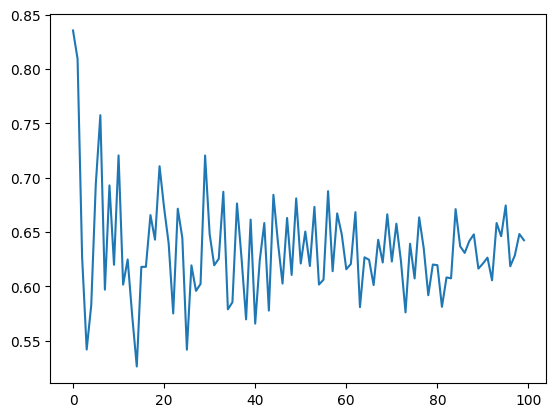

In [42]:
experimento(100)